# Plotting a spectrogram

In addition to plotting data in the time or frequency domains, it is possible to show both time and frequency information by plotting a spectrogram of the data.  One method to do this is the "Q-transform", which uses a wavelet basis to transform data into a time-frequency representation.

In this notebook, a simulated signal will be added to some white noise, and then displayed as a spectrogram.


In [3]:
# -- For google co-lab
! pip install -q pycbc gwpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 34.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


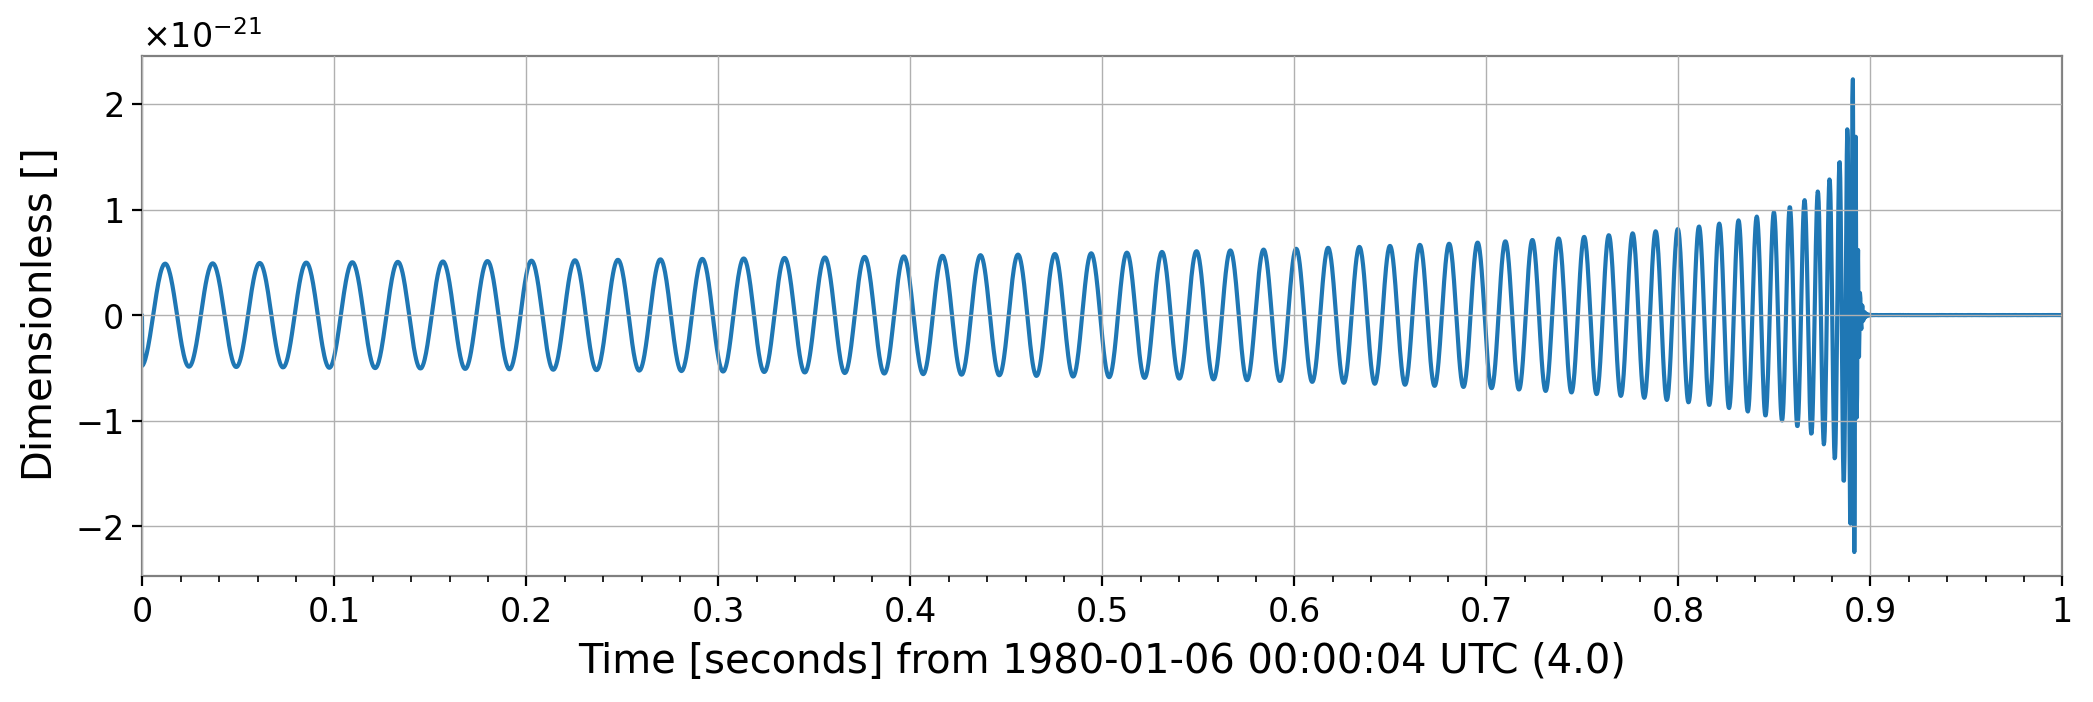

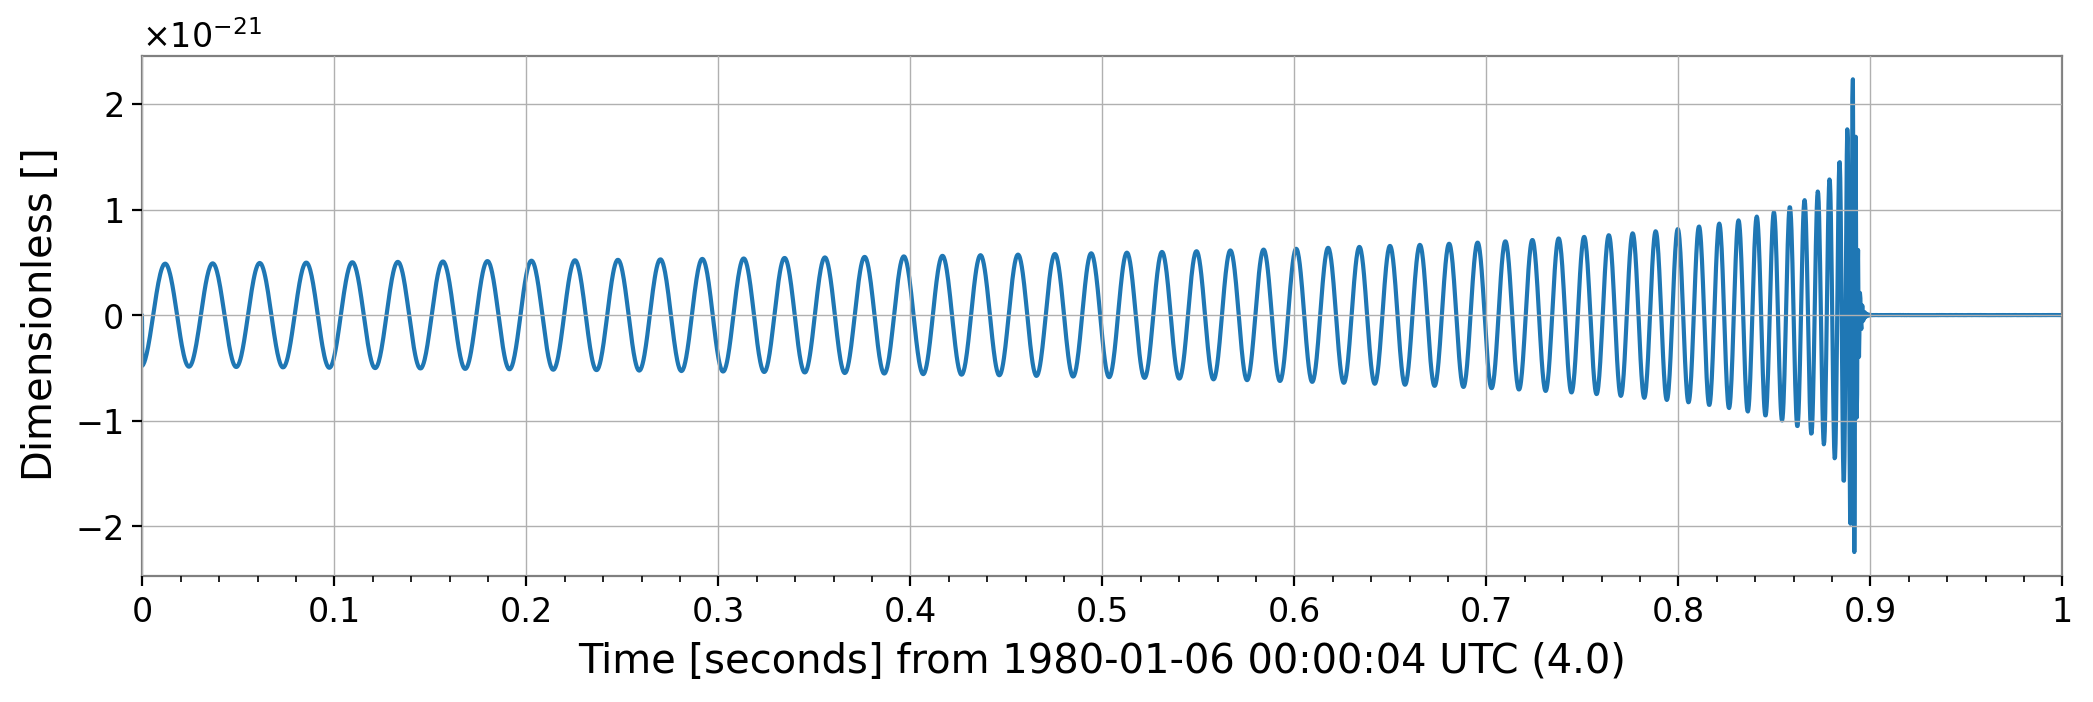

In [4]:
import numpy as np
from pycbc.waveform import get_td_waveform
from gwpy.timeseries import TimeSeries
%matplotlib inline
%config InlineBackend.figure_format='retina'

fs = 4096
apx = 'SEOBNRv2'
hp, hc = get_td_waveform(approximant=apx,
                                 mass1=10,
                                 mass2=10,
                                 delta_t=1.0/fs,
                                 distance = 100,
                                 f_lower=40)

# -- Load the signal into a gwpy TimeSeries object
cbc = TimeSeries(hp, dt=1/fs, t0 = 4)

# -- Make some white noise
noise_arr = np.random.random(fs*8)*1e-24
noise = TimeSeries(noise_arr, dt=1.0/fs)

# -- "Inject" the signal into the noise
data = noise.inject(cbc)
data.plot(xlim = (4,5))

(20, 1000)

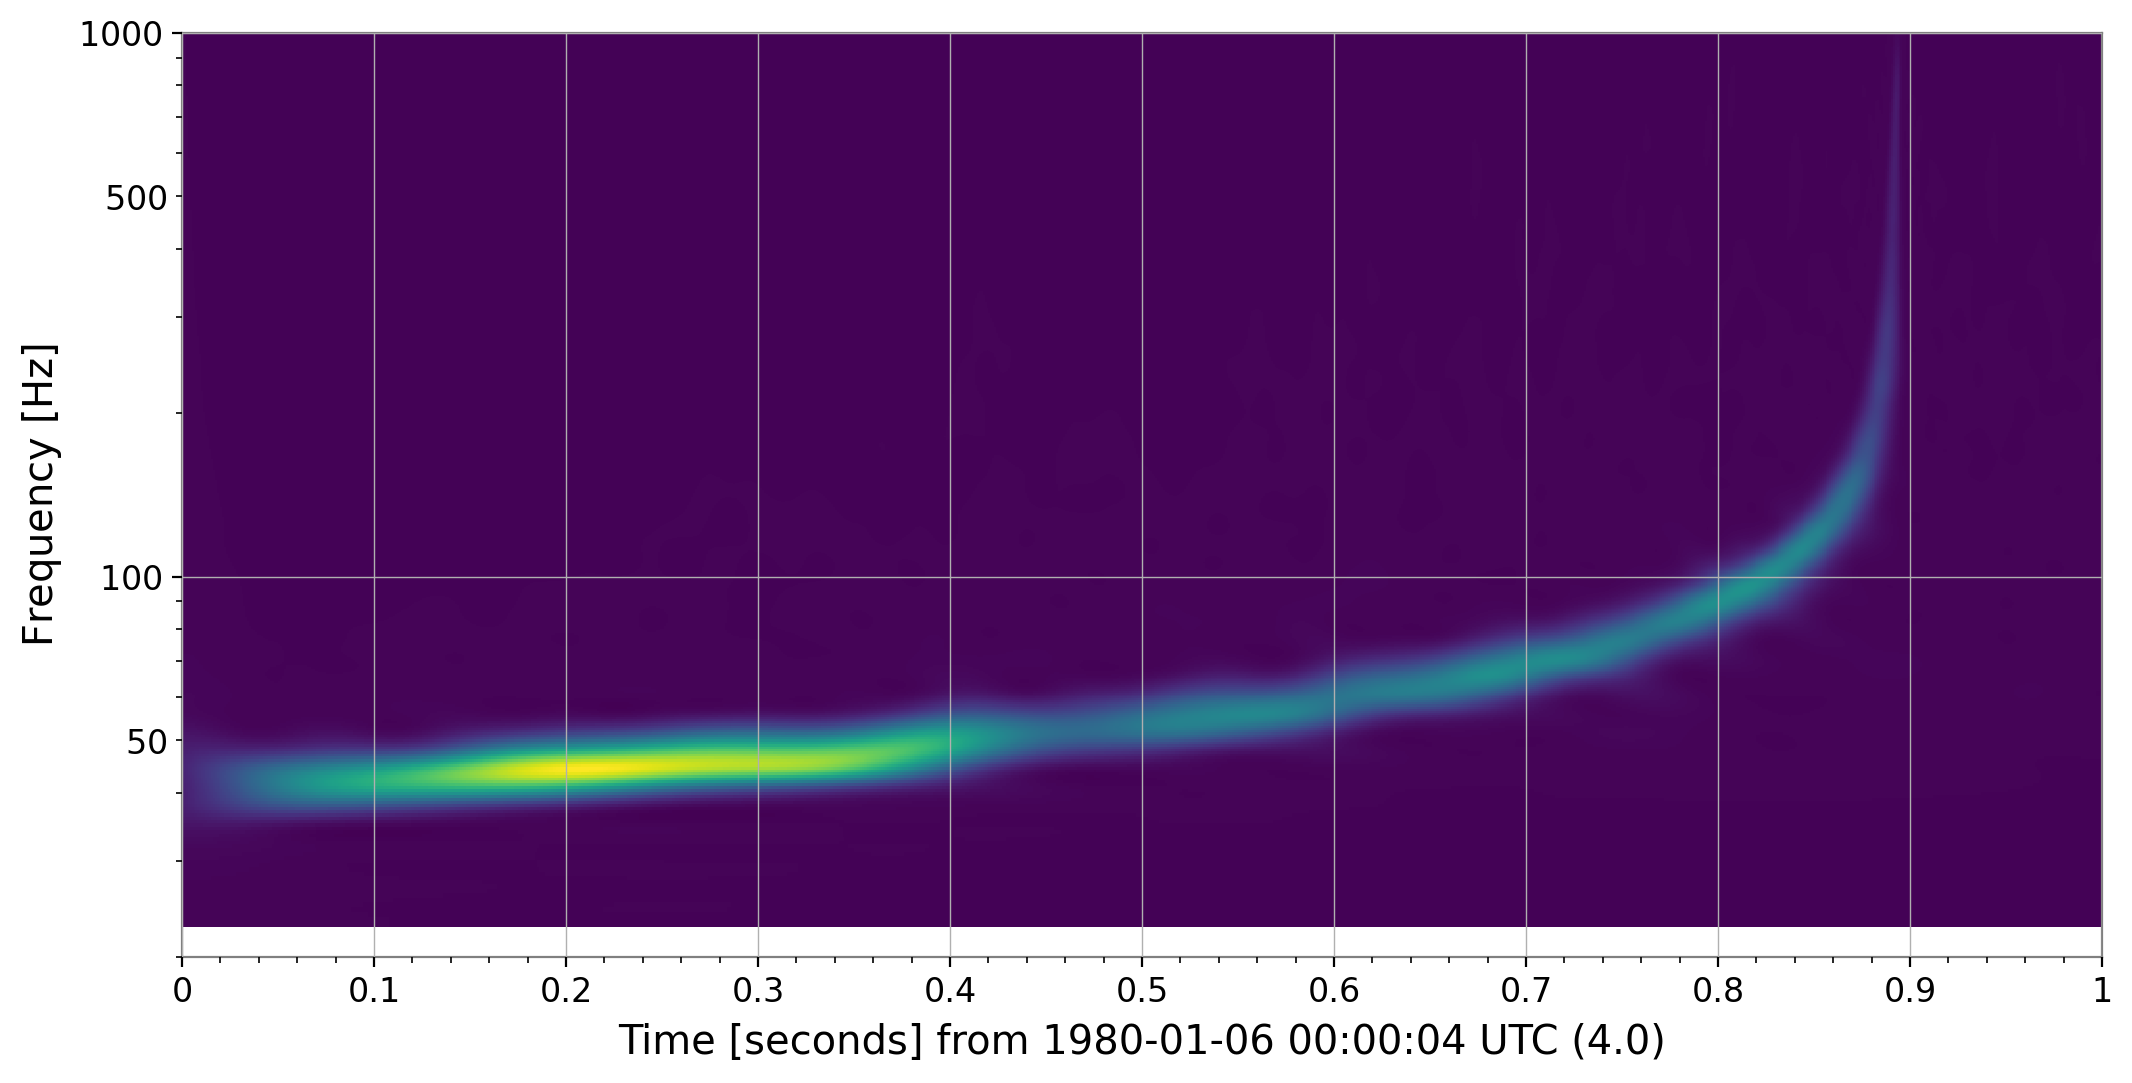

In [6]:
plot = data.q_transform(outseg=(4,5), qrange=(10,30)).plot()

ax = plot.gca()
ax.set_xscale('seconds')
ax.set_yscale('log')
ax.set_ylim(20, 1000)

## Check Questions

1. What is the frequency of the signal at early times, around 0.8 seconds before merger?
1. What is the frequency of the signal around the merger time?
1. Why does the frequency increase as you get get closer to the end?

1. Around 0.8 seconds before the merger the frequency is about 50 hz.
2. Around the merger time the frequency is at least four times greater than 0.8 seconds before; that is to say, around 200 hz.
3. Frequency increases as the two compact objects orbit faster as they approach each other.

## Practice with python

1. Try making the same plots, for a signal with mass 1 = mass 2 = 30 solar masses
1. What things are different in the lower mass and higher mass signal?

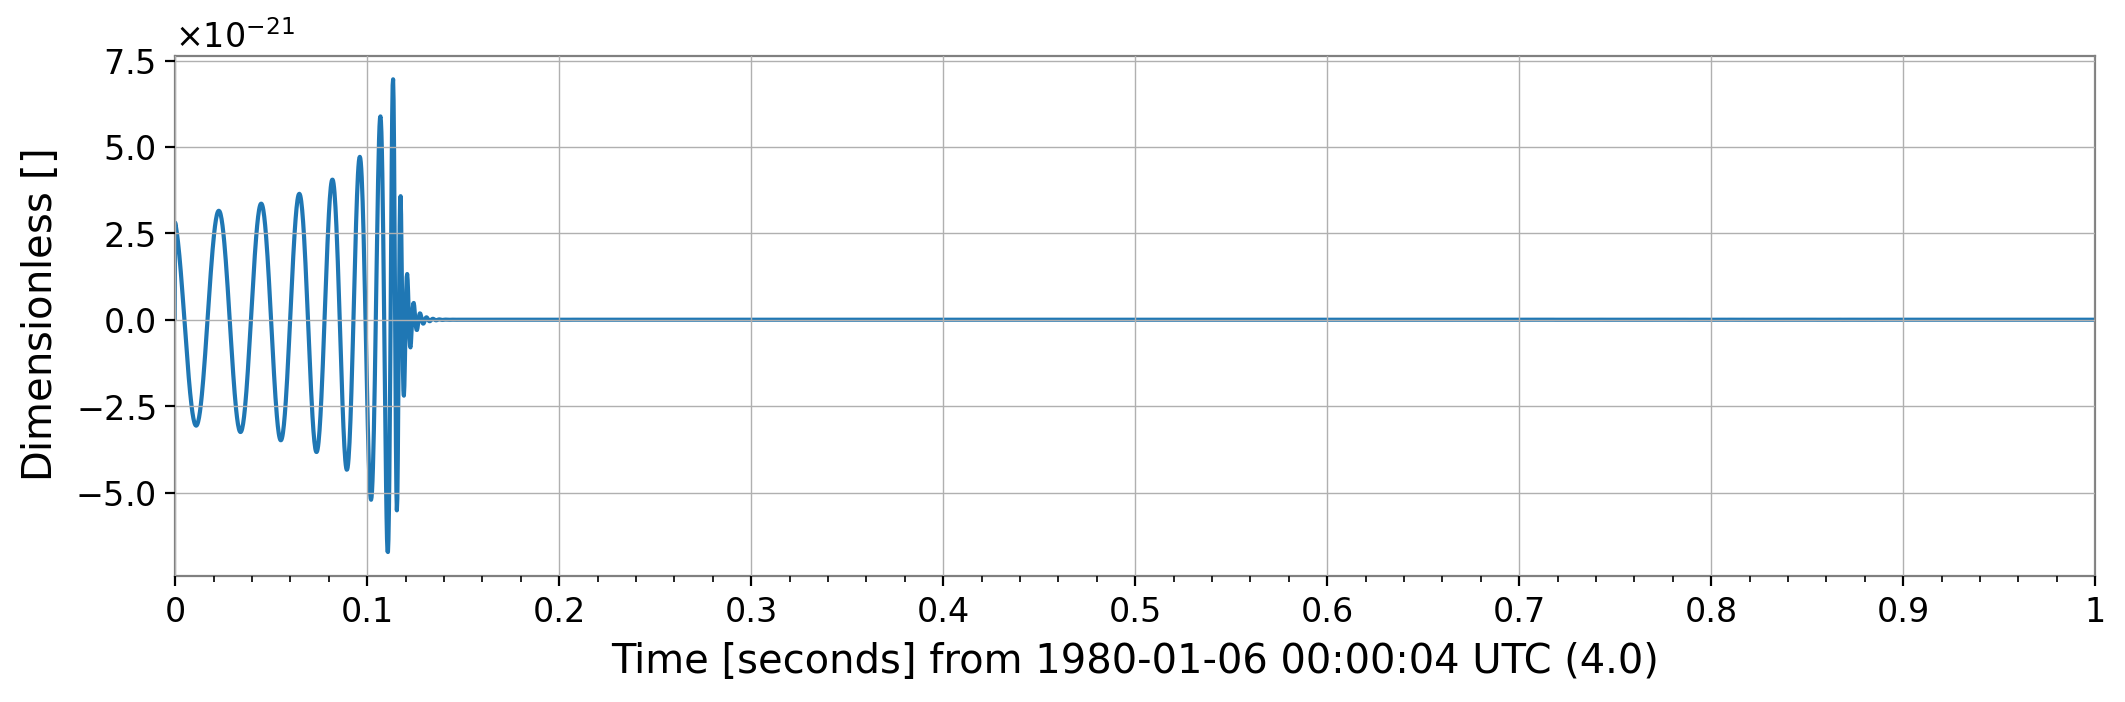

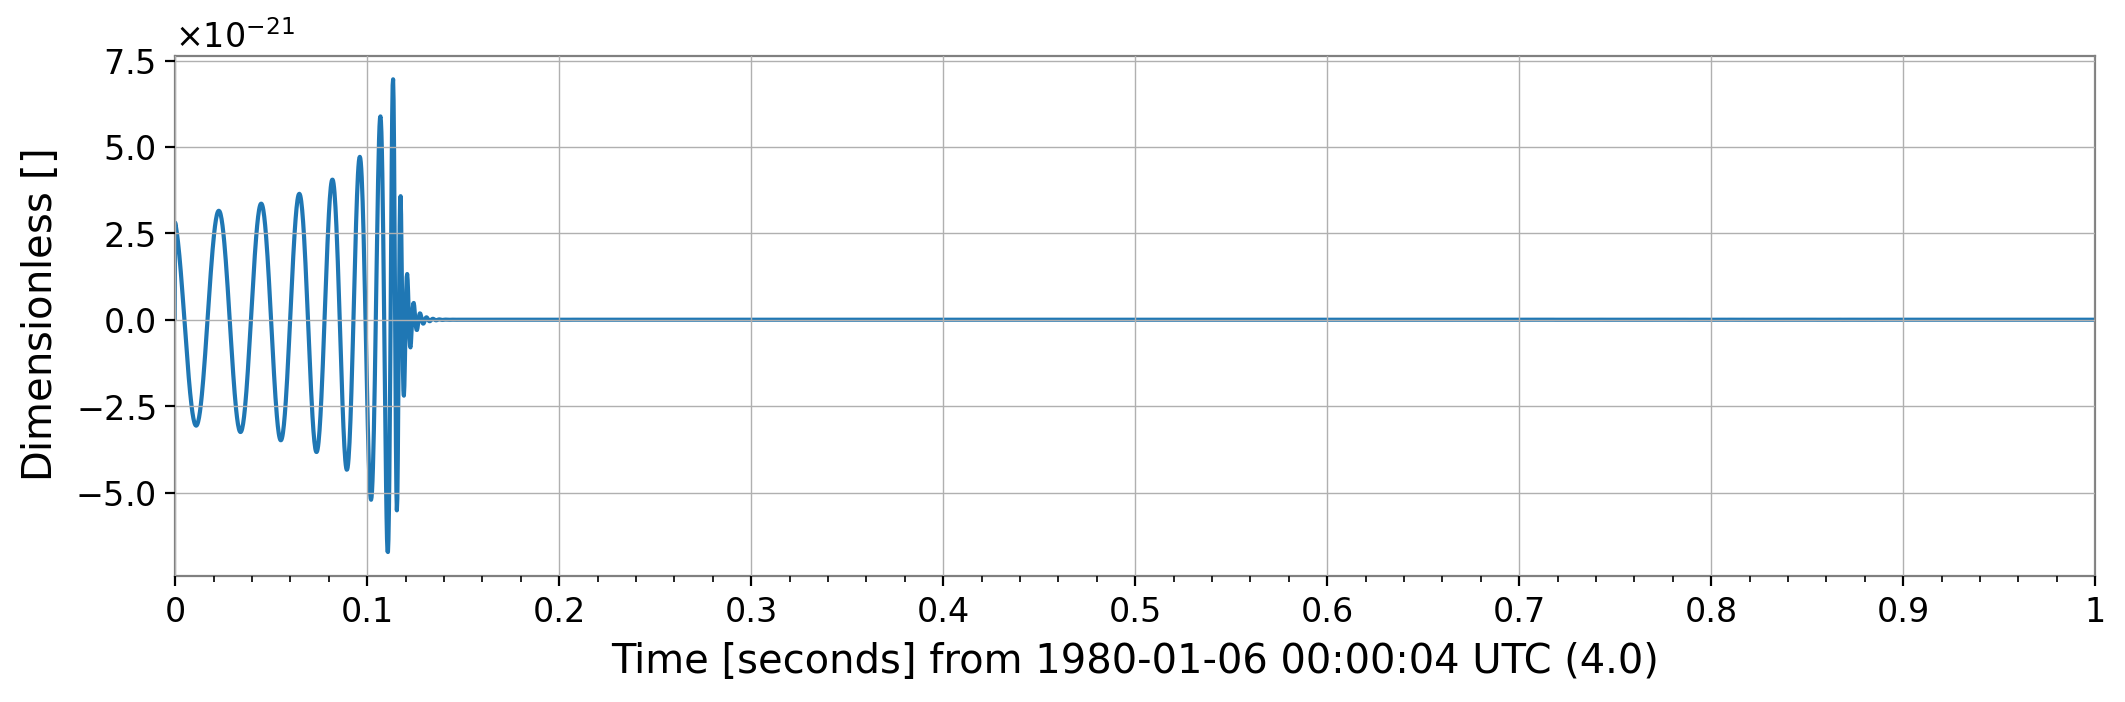

In [8]:
hp, hc = get_td_waveform(approximant=apx,
                                 mass1=30,
                                 mass2=30,
                                 delta_t=1.0/fs,
                                 distance = 100,
                                 f_lower=40)

# -- Load the signal into a gwpy TimeSeries object
cbc = TimeSeries(hp, dt=1/fs, t0 = 4)

# -- Make some white noise
noise_arr = np.random.random(fs*8)*1e-24
noise = TimeSeries(noise_arr, dt=1.0/fs)

# -- "Inject" the signal into the noise
data = noise.inject(cbc)
data.plot(xlim = (4,5))

(20, 1000)

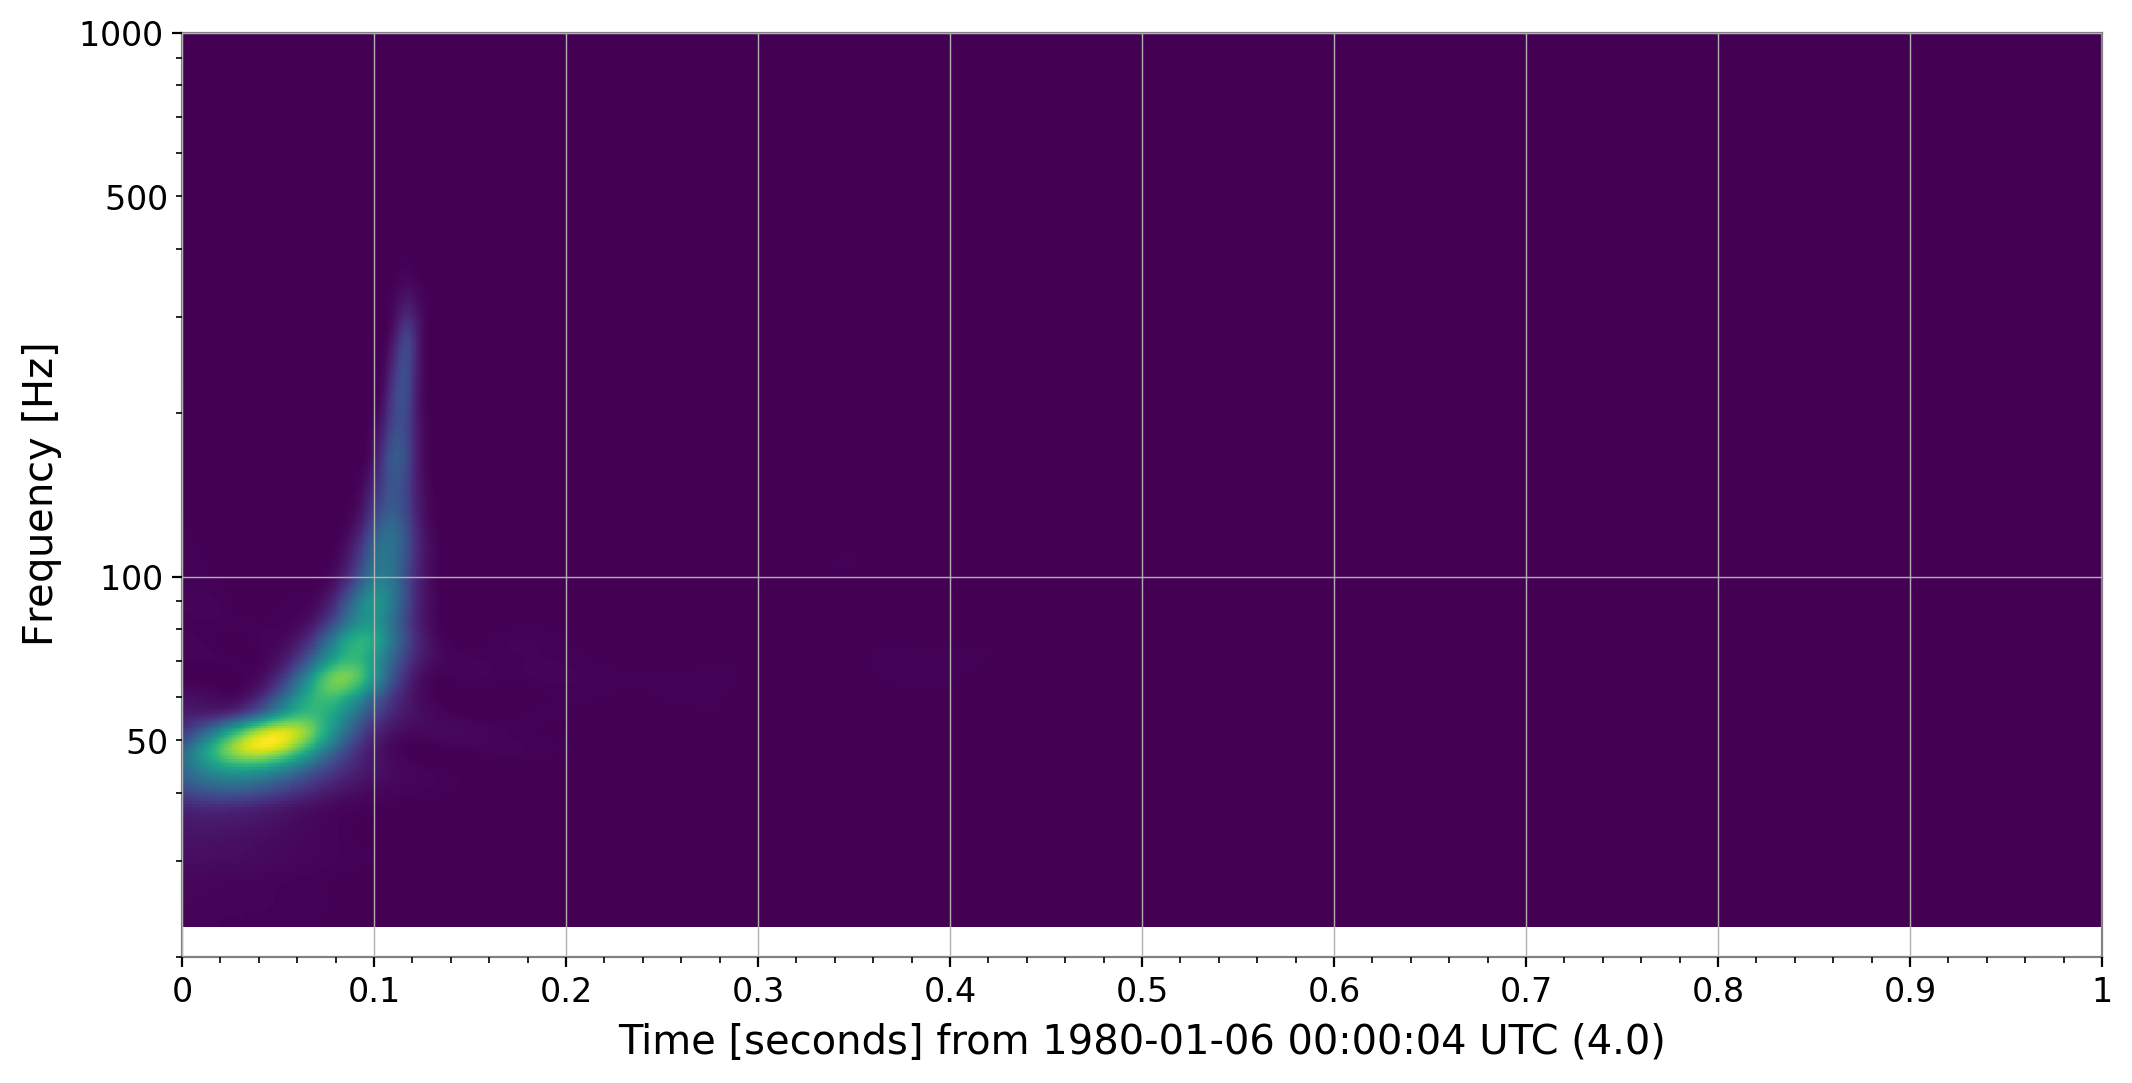

In [9]:
plot = data.q_transform(outseg=(4,5), qrange=(10,30)).plot()

ax = plot.gca()
ax.set_xscale('seconds')
ax.set_yscale('log')
ax.set_ylim(20, 1000)

I notice the higher mass waveform lasts about 0.1 s against the 0.9 s of the lower mass signal. The higher mass signal is greater in amplitude, reaching values above 7 against the values below 3 of the lower mass signal. The lower mass signal reaches higher frequencies (around 1000 hz) compared to the higher mass signal (which doesn't go above 500 hz). Finally, the lower mass signal seems to spend less time at relatively high frequencies than the higher mass signal: only the plateau in the first case is a bright yellow, while in the second case the whole knee is a bright yellow.